In [102]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM
from keras.layers import GRU
import tensorflow as tf
import math
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from sklearn.metrics import mean_squared_error

In [103]:
def plot_predictions(test,predicted):
    plt.figure(figsize = (20,10))
    plt.plot(test, color='red',label='Real DSEX Stock Price')
    plt.plot(predicted, color='blue',label='Predicted DSEX Stock Price')
    plt.title('Google Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Google Stock Price')
    plt.legend()
    plt.show()

In [104]:
def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [105]:
dataset1 = pd.read_csv('goog1.csv', index_col='Date', parse_dates=['Date']) 
dataset1.tail()

,Close,High,Low,Open,Adj Close,Volume
Date,,,,,,
2019-04-26,1272.180054,1273.069946,1260.319946,1269.000000,1272.180054,1241400
2019-04-29,1287.579956,1289.270020,1266.295044,1274.000000,1287.579956,2499400
2019-04-30,1188.479980,1192.810059,1175.000000,1185.000000,1188.479980,6207000
2019-05-01,1168.079956,1188.050049,1167.180054,1188.050049,1168.079956,2639200
2019-05-02,1162.609985,1174.189941,1155.001953,1167.760010,1162.609985,1943700


In [106]:
dataset=dataset1.drop(columns=['Volume']) # Original Data

In [107]:
dataset.tail()

,Close,High,Low,Open,Adj Close
Date,,,,,
2019-04-26,1272.180054,1273.069946,1260.319946,1269.000000,1272.180054
2019-04-29,1287.579956,1289.270020,1266.295044,1274.000000,1287.579956
2019-04-30,1188.479980,1192.810059,1175.000000,1185.000000,1188.479980
2019-05-01,1168.079956,1188.050049,1167.180054,1188.050049,1168.079956
2019-05-02,1162.609985,1174.189941,1155.001953,1167.760010,1162.609985


In [108]:
training_set = dataset[:'2018'].iloc[:,0:6]
test_set = dataset['2019':].iloc[:,0:1]

In [109]:
len(training_set)

1427

In [110]:
len(test_set)

84

In [111]:
training_set.head()

,Close,High,Low,Open,Adj Close
Date,,,,,
2013-05-02,412.124542,414.578552,406.878632,407.400269,412.124542
2013-05-03,420.127472,420.663971,415.298889,415.775787,420.127472
2013-05-06,427.991333,428.140350,421.389282,421.389282,427.991333
2013-05-07,425.845276,429.143829,422.586487,428.716614,425.845276
2013-05-08,433.992310,434.116486,423.699249,425.731018,433.992310


In [112]:
test_set.head()

,Close
Date,
2019-01-02,1045.849976
2019-01-03,1016.059998
2019-01-04,1070.709961
2019-01-07,1068.390015
2019-01-08,1076.280029


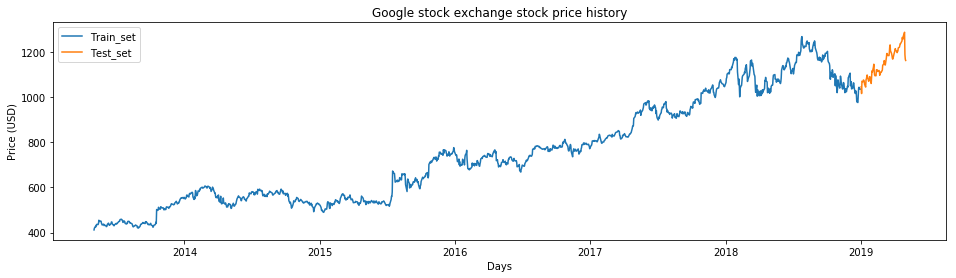

In [113]:
from matplotlib import pyplot as plt
plt.figure(figsize=(16,4))

plt.plot(training_set["Close"])
plt.plot(test_set["Close"])

plt.title('Google stock exchange stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Train_set','Test_set'], loc='upper left')
plt.show()

In [114]:
training_set.shape

(1427, 5)

In [115]:
test_set.shape

(84, 1)

In [116]:
train= training_set.values.reshape(-1, 1)
test = test_set.values.reshape(-1, 1)

In [117]:
test.shape

(84, 1)

In [118]:
scaler = MinMaxScaler(feature_range=(0, 4))

train_sc = scaler.fit_transform(train)
test_sc = scaler.fit_transform(test)

In [119]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_sc = scaler.fit_transform(train)
test_sc = scaler.fit_transform(test)

In [120]:
X_train = train_sc[:-1]
y_train = train_sc[1:]
X_test = test_sc[:-1]
y_test = test_sc[1:]

In [121]:
X_train.shape

(7134, 1)

In [122]:
#get number of columns in training data
n_cols = X_train.shape[1]

In [123]:
n_cols

1

In [124]:
nn_model = Sequential()

nn_model.add(Dense(12, activation='relu', input_shape=(n_cols,))) #Layer1
nn_model.add(Dense(12, activation='sigmoid')) #Layer 2
nn_model.add(Dense(1)) #Output Layer
nn_model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
early_stop = EarlyStopping(monitor='loss', patience=100, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=128, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/100
7134/7134 [==============================] - 5s 740us/step - loss: 1.0607 - acc: 0.0000e+00
Epoch 2/100
7134/7134 [==============================] - 0s 45us/step - loss: 0.8635 - acc: 0.0000e+00
Epoch 3/100
7134/7134 [==============================] - 0s 48us/step - loss: 0.7180 - acc: 0.0000e+00
Epoch 4/100
7134/7134 [==============================] - 0s 45us/step - loss: 0.5598 - acc: 0.0000e+00
Epoch 5/100
7134/7134 [==============================] - 0s 52us/step - loss: 0.4048 - acc: 0.0000e+00
Epoch 6/100
7134/7134 [==============================] - 0s 53us/step - loss: 0.2725 - acc: 0.0000e+00
Epoch 7/100
7134/7134 [==============================] - 0s 48us/step - loss: 0.1748 - acc: 0.0000e+00
Epoch 8/100
7134/7134 [==============================] - 0s 50us/step - loss: 0.1115 - acc: 0.0000e+00
Epoch 9/100
7134/7134 [==============================] - 0s 48us/step - loss: 0.0746 - acc: 0.0000e+00
Epoch 10/100
7134/7134 [==============================] - 0s 46us/step -

7134/7134 [==============================] - 0s 47us/step - loss: 0.0042 - acc: 0.0000e+00
Epoch 80/100
7134/7134 [==============================] - 0s 45us/step - loss: 0.0042 - acc: 0.0000e+00
Epoch 81/100
7134/7134 [==============================] - 0s 43us/step - loss: 0.0041 - acc: 0.0000e+00
Epoch 82/100
7134/7134 [==============================] - 0s 70us/step - loss: 0.0040 - acc: 0.0000e+00
Epoch 83/100
7134/7134 [==============================] - 0s 63us/step - loss: 0.0040 - acc: 0.0000e+00
Epoch 84/100
7134/7134 [==============================] - 0s 68us/step - loss: 0.0039 - acc: 0.0000e+00
Epoch 85/100
7134/7134 [==============================] - 0s 54us/step - loss: 0.0039 - acc: 0.0000e+00
Epoch 86/100
7134/7134 [==============================] - 0s 40us/step - loss: 0.0038 - acc: 0.0000e+00
Epoch 87/100
7134/7134 [==============================] - 0s 41us/step - loss: 0.0038 - acc: 0.0000e+00
Epoch 88/100
7134/7134 [==============================] - 0s 41us/step - loss

In [125]:
nn_y_pred_test = nn_model.predict(X_test)

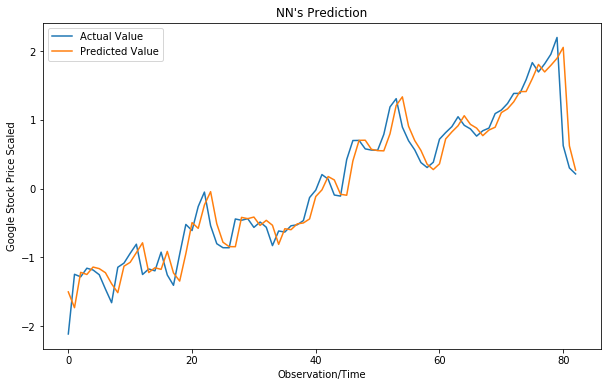

In [126]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Value')
plt.plot(nn_y_pred_test, label='Predicted Value')
plt.title("NN's Prediction")
plt.xlabel('Observation/Time')
plt.ylabel('Google Stock Price Scaled')
plt.legend()
plt.show();

In [127]:
return_rmse(y_test,nn_y_pred_test)

The root mean squared error is 0.27477616840400815.


In [128]:
predicted_stock_price = scaler.inverse_transform(nn_y_pred_test)

In [129]:
y_testp = scaler.inverse_transform(y_test)

In [130]:
return_rmse(y_testp,predicted_stock_price)

The root mean squared error is 17.288298862698.


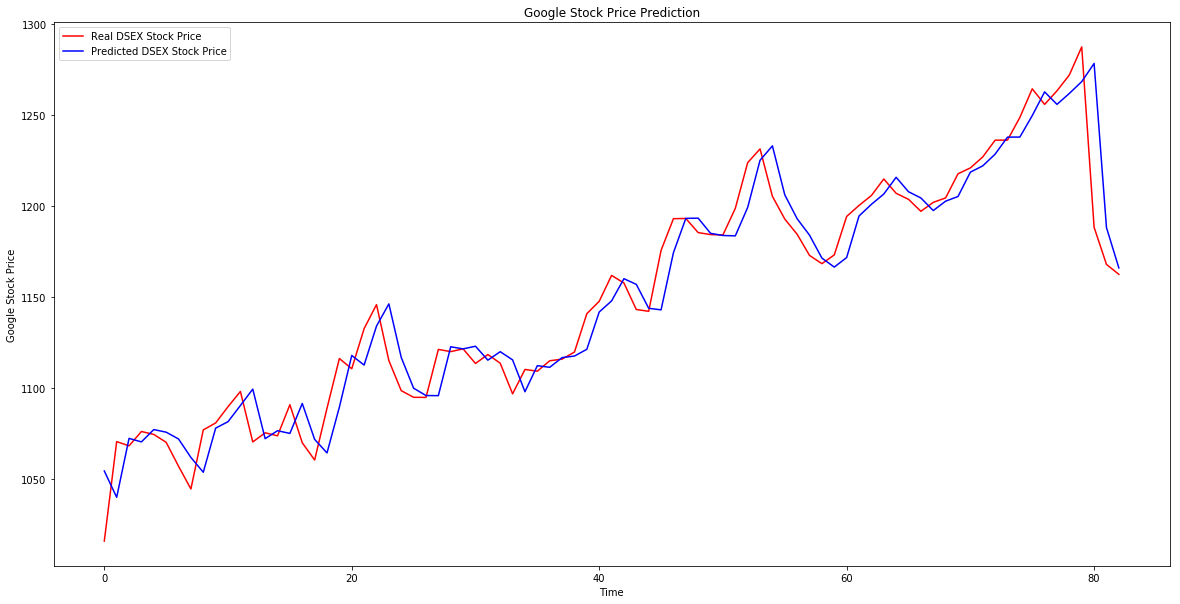

In [131]:
plot_predictions(y_testp,predicted_stock_price)

In [57]:
z = y_testp-predicted_stock_price

In [54]:
scores = nn_model.evaluate(y_testp,predicted_stock_price)
print("%s: %.2f%%" % (nn_model.metrics_names[1], scores[1]*100))


83/83 [==============================] - 0s 3ms/step
acc: 0.00%


# LSTM

In [59]:
from statsmodels.tsa.stattools import pacf

In [60]:
dataset_pacf = pacf(dataset, nlags = 5, method = 'ols')

In [61]:
dataset_pacf

array([1.0,
       array([0.99889896, 1.00865019, 0.98861912, 0.99849333, 0.99889896]),
       array([ 0.06522218,  0.27638663, -0.22204966, -0.00468103,  0.06522218]),
       array([ 0.12255035, -0.1834763 ,  0.28860002,  0.00234269,  0.12255035]),
       array([-0.23893056, -0.28679139, -0.13453715, -0.15711634, -0.23893056]),
       array([0.34384353, 0.34034802, 0.45597215, 0.45010523, 0.34384353])],
      dtype=object)

In [62]:
XL_train = []
yL_train = []
for i in range(1,1427+1):
    XL_train.append(train_sc[i-1:i,0])
    yL_train.append(train_sc[i,0])
XL_train, yL_train = np.array(XL_train), np.array(yL_train)

In [63]:
XL_train = np.reshape(XL_train, (XL_train.shape[0],XL_train.shape[1],1))

In [64]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=60, activation = 'tanh' , inner_activation = 'hard_sigmoid',return_sequences=True, input_shape=(XL_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=60, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=60, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=60))

# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')

/Users/san/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=60, activation="tanh", return_sequences=True, input_shape=(1, 1), recurrent_activation="hard_sigmoid")`
  after removing the cwd from sys.path.


In [65]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='loss', patience=50, verbose=1)
history = regressor.fit(XL_train, yL_train, epochs=100, batch_size=256, verbose=1, callbacks=[early_stop], shuffle=True)




Epoch 1/100
1427/1427 [==============================] - 15s 11ms/step - loss: 1.1712
Epoch 2/100
1427/1427 [==============================] - 0s 321us/step - loss: 1.0064
Epoch 3/100
1427/1427 [==============================] - 1s 367us/step - loss: 0.7336
Epoch 4/100
1427/1427 [==============================] - 1s 364us/step - loss: 0.3517
Epoch 5/100
1427/1427 [==============================] - 1s 382us/step - loss: 0.0723
Epoch 6/100
1427/1427 [==============================] - 1s 376us/step - loss: 0.0271
Epoch 7/100
1427/1427 [==============================] - 1s 378us/step - loss: 0.0259
Epoch 8/100
1427/1427 [==============================] - 1s 361us/step - loss: 0.0249
Epoch 9/100
1427/1427 [==============================] - 0s 335us/step - loss: 0.0247
Epoch 10/100
1427/1427 [==============================] - 1s 417us/step - loss: 0.0255
Epoch 11/100
1427/1427 [==============================] - 1s 362us/step - loss: 0.0270
Epoch 12/100
1427/1427 [============================

1427/1427 [==============================] - 1s 393us/step - loss: 0.0078
Epoch 96/100
1427/1427 [==============================] - 1s 388us/step - loss: 0.0073
Epoch 97/100
1427/1427 [==============================] - 1s 373us/step - loss: 0.0080
Epoch 98/100
1427/1427 [==============================] - 1s 384us/step - loss: 0.0081
Epoch 99/100
1427/1427 [==============================] - 1s 539us/step - loss: 0.0080
Epoch 100/100
1427/1427 [==============================] - 1s 597us/step - loss: 0.0076


In [74]:
dataset_total = pd.concat((dataset["Close"][:'2018'],dataset["Close"]['2019':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 1:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [75]:
XL_test = []
yL_test = []
for i in range(1,83+1): #lenght of y_test+2
    XL_test.append(inputs[i-1:i,0])
    yL_test.append(inputs[i,0])
XL_test = np.array(XL_test)
XL_test = np.reshape(XL_test, (XL_test.shape[0],XL_test.shape[1],1))


predicted_stock_price = regressor.predict(XL_test)

In [76]:
return_rmse(y_test,predicted_stock_price)

The root mean squared error is 0.7237858409664341.


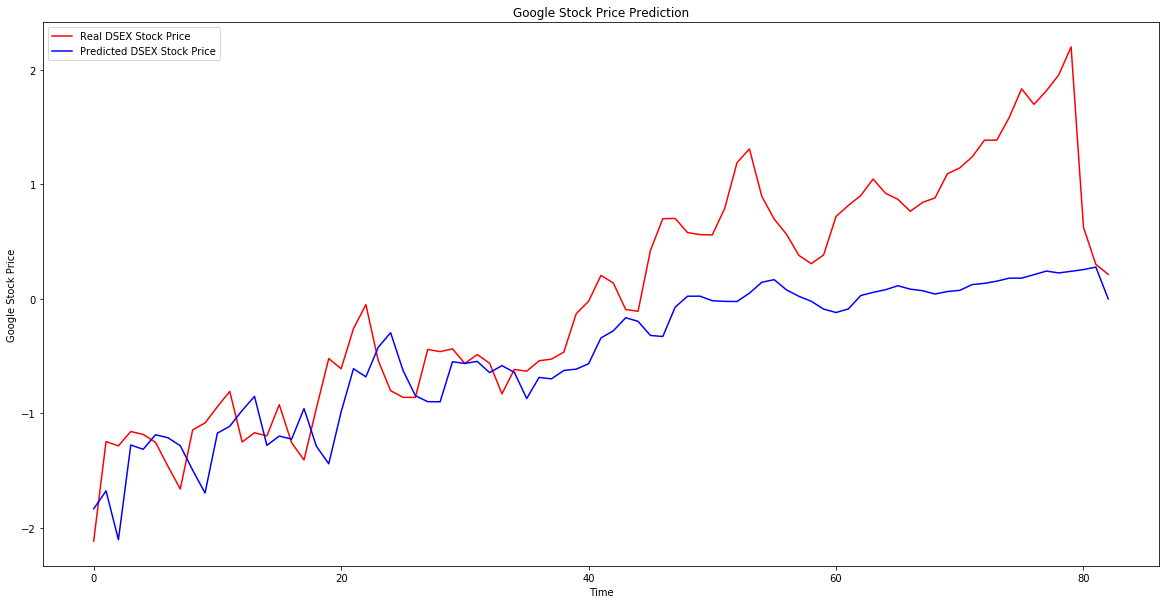

In [77]:
plot_predictions(y_test,predicted_stock_price)

# GRU

In [44]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(GRU(units=60, activation = 'tanh' , inner_activation = 'hard_sigmoid',return_sequences=True, input_shape=(XL_train.shape[1],1)))
# Second LSTM layer
regressor.add(GRU(units=60, return_sequences=True))
# Third LSTM layer
regressor.add(GRU(units=60, return_sequences=True))
# Fourth LSTM layer
regressor.add(GRU(units=60))

# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')

/Users/san/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `GRU` call to the Keras 2 API: `GRU(units=60, activation="tanh", return_sequences=True, input_shape=(1, 1), recurrent_activation="hard_sigmoid")`
  after removing the cwd from sys.path.


In [132]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1)
history = regressor.fit(XL_train, yL_train, epochs=500, batch_size=256, verbose=1, callbacks=[early_stop], shuffle=True)




Epoch 1/500
1427/1427 [==============================] - 1s 994us/step - loss: 0.0072
Epoch 2/500
1427/1427 [==============================] - 1s 659us/step - loss: 0.0079
Epoch 3/500
1427/1427 [==============================] - 1s 666us/step - loss: 0.0072
Epoch 4/500
1427/1427 [==============================] - 1s 711us/step - loss: 0.0075
Epoch 5/500
1427/1427 [==============================] - 1s 618us/step - loss: 0.0066
Epoch 6/500
1427/1427 [==============================] - 1s 732us/step - loss: 0.0068
Epoch 7/500
1427/1427 [==============================] - 1s 599us/step - loss: 0.0069
Epoch 8/500
1427/1427 [==============================] - 1s 657us/step - loss: 0.0068
Epoch 9/500
1427/1427 [==============================] - 1s 554us/step - loss: 0.0068
Epoch 10/500
1427/1427 [==============================] - 1s 703us/step - loss: 0.0072
Epoch 11/500
1427/1427 [==============================] - 1s 573us/step - loss: 0.0058
Epoch 12/500
1427/1427 [============================

1427/1427 [==============================] - 1s 971us/step - loss: 0.0032
Epoch 96/500
1427/1427 [==============================] - 1s 819us/step - loss: 0.0023
Epoch 97/500
1427/1427 [==============================] - 1s 944us/step - loss: 0.0031
Epoch 98/500
1427/1427 [==============================] - 1s 752us/step - loss: 0.0028
Epoch 99/500
1427/1427 [==============================] - 1s 580us/step - loss: 0.0023
Epoch 100/500
1427/1427 [==============================] - 2s 1ms/step - loss: 0.0030
Epoch 101/500
1427/1427 [==============================] - 1s 744us/step - loss: 0.0024
Epoch 102/500
1427/1427 [==============================] - 1s 920us/step - loss: 0.0021
Epoch 103/500
1427/1427 [==============================] - 1s 769us/step - loss: 0.0029
Epoch 104/500
1427/1427 [==============================] - 1s 687us/step - loss: 0.0024
Epoch 105/500
1427/1427 [==============================] - 1s 611us/step - loss: 0.0024
Epoch 106/500
1427/1427 [===========================

In [133]:
dataset_total = pd.concat((dataset["Close"][:'2018'],dataset["Close"]['2019':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 1:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [134]:
XL_test = []
yL_test = []
for i in range(1,83+1): #lenght of y_test+2
    XL_test.append(inputs[i-1:i,0])
    yL_test.append(inputs[i,0])
XL_test = np.array(XL_test)
XL_test = np.reshape(XL_test, (XL_test.shape[0],XL_test.shape[1],1))


predicted_stock_price = regressor.predict(XL_test)

In [135]:
return_rmse(y_test,predicted_stock_price)

The root mean squared error is 0.7808787514464715.


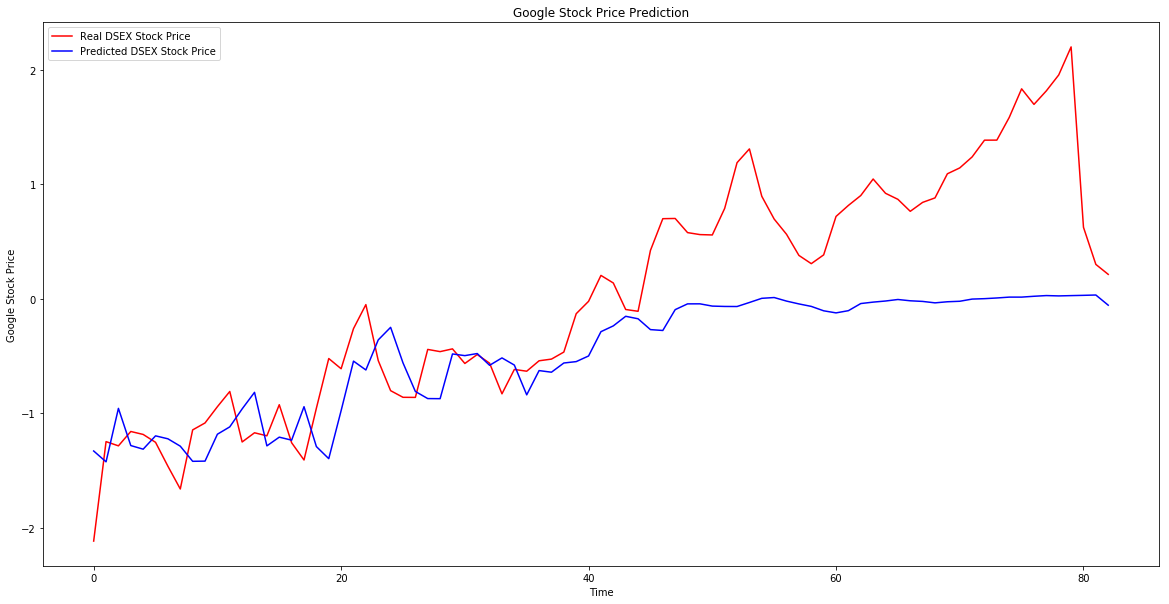

In [136]:
plot_predictions(y_test,predicted_stock_price)

# PCA

In [125]:


train = dataset1[:'2018'].iloc[:,1:5]
test = dataset1[:'2018'].iloc[:,0:1]


In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(train)
y = scaler.fit_transform(test)

In [127]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pca1', 'pca2','pca3'])

In [128]:
len(train)

1427

In [129]:
training_set  = scaler.inverse_transform(principalDf)
test_set = test

In [130]:
training_set

array([[  71.48047458,  746.27463244,  751.64269508],
       [  86.93782314,  745.83531943,  749.93998536],
       [ 100.45498952,  744.73254968,  751.38356219],
       ...,
       [1301.97898499,  739.97893947,  775.06548548],
       [1338.83879664,  758.03002847,  747.57232517],
       [1332.55268445,  761.9360091 ,  751.26058082]])

In [131]:
test_set.shape

(1427, 1)

In [132]:
train= principalDf.values.reshape(-1,1)
test = test_set.values.reshape(-1,1)

In [133]:
training_set.shape

(1427, 3)

In [134]:
train.shape

(4281, 1)

In [135]:
scaler = MinMaxScaler(feature_range=(-1, 1))
train_sc = train
test_sc = scaler.fit_transform(test)

In [136]:
X_train = train_sc[:-1]
y_train = train_sc[1:]
X_test = test_sc[:-1]
y_test = test_sc[1:]

In [137]:
X_train.shape

(4280, 1)

In [138]:
y_train.shape

(4280, 1)

In [139]:
y_test

array([[-0.98130605],
       [-0.96293695],
       [-0.9679499 ],
       ...,
       [ 0.47571004],
       [ 0.45982589],
       [ 0.4563922 ]])

In [146]:
nn_model = Sequential()
nn_model.add(Dense(10, input_dim=1, activation='relu'))
nn_model.add(Dense(12, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/100
4280/4280 [==============================] - 17s 4ms/step - loss: 0.7288
Epoch 2/100
4280/4280 [==============================] - 14s 3ms/step - loss: 0.7394
Epoch 3/100
4280/4280 [==============================] - 14s 3ms/step - loss: 0.7222
Epoch 4/100
4280/4280 [==============================] - 14s 3ms/step - loss: 0.7156
Epoch 5/100
4280/4280 [==============================] - 14s 3ms/step - loss: 0.7157
Epoch 6/100
4280/4280 [==============================] - 14s 3ms/step - loss: 0.7106
Epoch 7/100
4280/4280 [==============================] - 14s 3ms/step - loss: 0.7083
Epoch 8/100
4280/4280 [==============================] - 14s 3ms/step - loss: 0.7092
Epoch 9/100
4280/4280 [==============================] - 14s 3ms/step - loss: 0.7073
Epoch 10/100
4280/4280 [==============================] - 15s 3ms/step - loss: 0.7054
Epoch 11/100
4280/4280 [==============================] - 17s 4ms/step - loss: 0.7034: 0s 
Epoch 12/100
4280/4280 [==============================] - 

In [144]:
nn_y_pred_test = nn_model.predict(X_test)

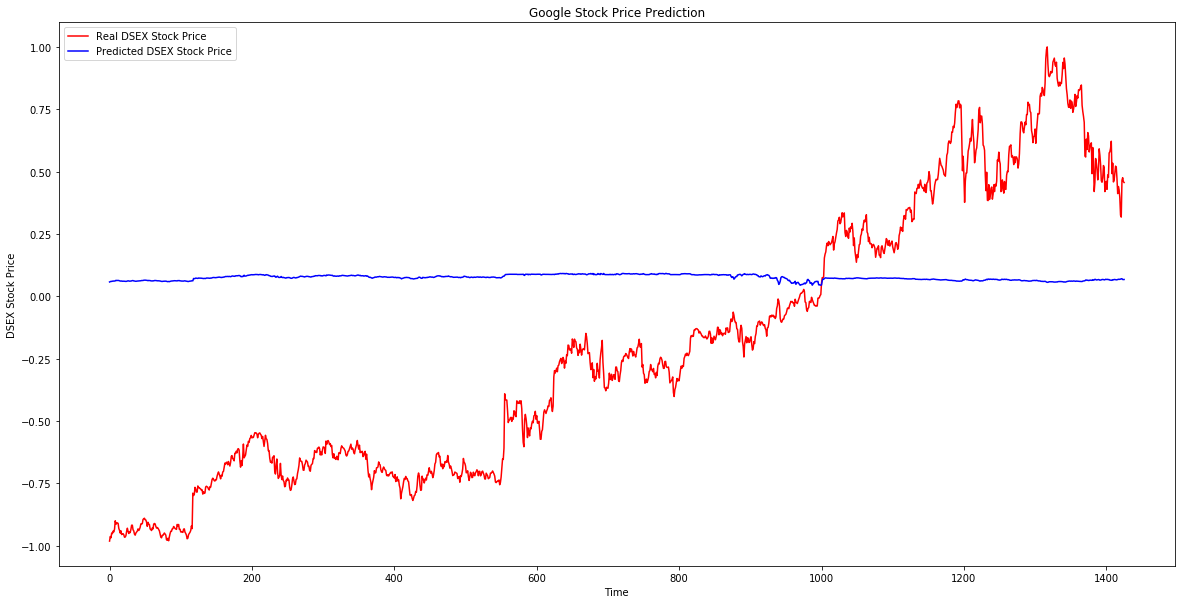

In [145]:
plot_predictions(y_test,nn_y_pred_test)

# Lasso

In [78]:
import pandas as pd
import numpy as np

from sklearn.linear_model import Ridge, Lasso

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm